In [1]:
import pandas as pd
import numpy as np
from utils import *


import seaborn as sns ;sns.set(rc={'figure.figsize':(20,10)})

import matplotlib.pyplot as plt
plt.rcParams ['figure.figsize']  = 25, 10
plt.rcParams ['axes.labelsize']  = 14
plt.rcParams ['xtick.labelsize'] = 12
plt.rcParams ['ytick.labelsize'] = 12
plt.rcParams ['text.color']      = 'black'
plt.rcParams ['axes.labelcolor'] = 'black'
plt.rcParams ['xtick.color']     = 'black'
plt.rcParams ['ytick.color']     = 'black'
plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings("ignore")


pd.options.display.float_format = '{:,.5f}'.format
pd.options.display.max_rows = 150
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 0


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%load_ext autoreload
%autoreload 2


## Explore datasets

In [2]:
kidney_dataset = pd.read_csv('../data/kidney_disease/kidney_disease.csv')
# kidney_dataset = pd.read_csv('../data/banknote/data_banknote_authentication.txt')

In [3]:
kidney_dataset.sample(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
16,16,47.00000,70.00000,1.01500,2.00000,0.00000,NaN,normal,notpresent,notpresent,99.00000,46.00000,2.20000,138.00000,4.10000,12.60000,NaN,NaN,NaN,no,no,no,good,no,no,ckd
171,171,83.00000,70.00000,1.02000,3.00000,0.00000,normal,normal,notpresent,notpresent,102.00000,60.00000,2.60000,115.00000,5.70000,8.70000,26,12800,3.1,yes,no,no,poor,no,yes,ckd
22,22,48.00000,80.00000,1.02500,4.00000,0.00000,normal,abnormal,notpresent,notpresent,95.00000,163.00000,7.70000,136.00000,3.80000,9.80000,32,6900,3.4,yes,no,no,good,no,yes,ckd
252,252,45.00000,80.00000,1.02500,0.00000,0.00000,normal,normal,notpresent,notpresent,82.00000,49.00000,0.60000,147.00000,4.40000,15.90000,46,9100,4.7,no,no,no,good,no,no,notckd
110,110,63.00000,90.00000,1.01500,0.00000,0.00000,NaN,normal,notpresent,notpresent,123.00000,19.00000,2.00000,142.00000,3.80000,11.70000,34,11400,4.7,no,no,no,good,no,no,ckd


In [4]:
kidney_dataset  = clean_noisy_data(kidney_dataset)

In [5]:
num_variables, categ_variables = detect_type(kidney_dataset.iloc[:,:-1]) #get categorical and numerical data
kidney_dataset.iloc[:,:-1] = replace_missing(kidney_dataset.iloc[:,:-1], num_variables, categ_variables) # replace missing values

In [6]:
kidney_dataset.sample(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
359,74.00000,60.00000,1.02000,0.00000,0.00000,normal,normal,notpresent,notpresent,88.00000,50.00000,0.60000,147.00000,3.70000,17.20000,53.00000,"6,000.00000",4.50000,no,no,no,good,no,no,0
72,64.00000,90.00000,1.01000,3.00000,3.00000,normal,abnormal,present,notpresent,148.03652,35.00000,1.30000,137.52875,4.62724,10.30000,38.88450,"8,406.12245",4.70743,yes,yes,no,good,yes,no,1
54,63.00000,80.00000,1.01000,2.00000,2.00000,normal,normal,notpresent,notpresent,148.03652,57.42572,3.40000,136.00000,4.20000,13.00000,40.00000,"9,800.00000",4.20000,yes,no,yes,good,no,no,1
373,61.00000,70.00000,1.02500,0.00000,0.00000,normal,normal,notpresent,notpresent,133.00000,38.00000,1.00000,142.00000,3.60000,13.70000,47.00000,"9,200.00000",4.90000,no,no,no,good,no,no,0
391,36.00000,80.00000,1.02500,0.00000,0.00000,normal,normal,notpresent,notpresent,85.00000,16.00000,1.10000,142.00000,4.10000,15.60000,44.00000,"5,800.00000",6.30000,no,no,no,good,no,no,0


In [7]:
data = center_encode(kidney_dataset.iloc[:,:-1], num_variables, categ_variables) # center and normalize the numerical data

In [8]:
data[kidney_dataset.columns[-1]] = kidney_dataset[kidney_dataset.columns[-1]]

In [9]:
kidney_dataset.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.00000,80.00000,1.02000,1.00000,0.00000,normal,normal,notpresent,notpresent,121.00000,36.00000,1.20000,137.52875,4.62724,15.40000,44.00000,"7,800.00000",5.20000,yes,yes,no,good,no,no,1
1,7.00000,50.00000,1.02000,4.00000,0.00000,normal,normal,notpresent,notpresent,148.03652,18.00000,0.80000,137.52875,4.62724,11.30000,38.00000,"6,000.00000",4.70743,no,no,no,good,no,no,1
2,62.00000,80.00000,1.01000,2.00000,3.00000,normal,normal,notpresent,notpresent,423.00000,53.00000,1.80000,137.52875,4.62724,9.60000,31.00000,"7,500.00000",4.70743,no,yes,no,poor,no,yes,1
3,48.00000,70.00000,1.00500,4.00000,0.00000,normal,abnormal,present,notpresent,117.00000,56.00000,3.80000,111.00000,2.50000,11.20000,32.00000,"6,700.00000",3.90000,yes,no,no,poor,yes,yes,1
4,51.00000,80.00000,1.01000,2.00000,0.00000,normal,normal,notpresent,notpresent,106.00000,26.00000,1.40000,137.52875,4.62724,11.60000,35.00000,"7,300.00000",4.60000,no,no,no,good,no,no,1


In [10]:
data.head(5)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
0,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-0.20546,0.26234,0.48335,-0.01334,-0.43780,-0.36199,-0.43527,-0.33374,0.00000,0.00000,1.05927,0.62837,-0.24052,0.58690,1
1,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-2.62381,-1.96658,0.48335,2.34752,-0.43780,0.00000,-0.80094,-0.40504,0.00000,0.00000,-0.45210,-0.10865,-0.95479,-0.00000,1
2,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.62031,0.26234,-1.38139,0.77361,2.47993,3.68144,-0.08991,-0.22680,0.00000,0.00000,-1.07876,-0.96851,-0.35956,-0.00000,1
3,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,-0.20546,-0.48063,-2.31376,2.34752,-0.43780,-0.41554,-0.02896,0.12968,-2.88583,-0.75534,-0.48896,-0.84567,-0.67702,-0.96208,1
4,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.02851,0.26234,-1.38139,0.77361,-0.43780,-0.56282,-0.63842,-0.29810,0.00000,0.00000,-0.34151,-0.47716,-0.43893,-0.12801,1


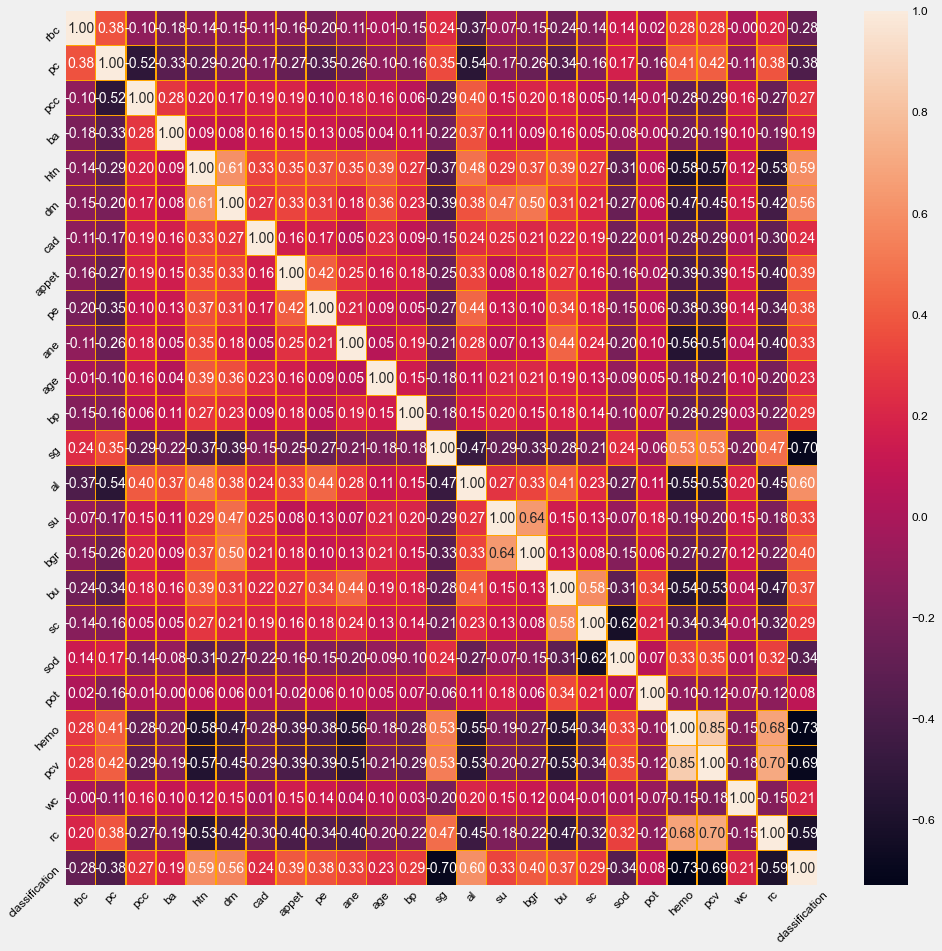

In [192]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Apply pca

In [208]:
from sklearn.decomposition import PCA
X,y = data.values[:,:-1],data.values[:,-1]
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)


[0.32905445 0.10759211 0.08452065 0.07248344 0.06349977 0.05918641
 0.05256529 0.03762034 0.03693626 0.02909499 0.02366991 0.02103267
 0.01562111 0.01151791 0.00985597 0.00866347 0.00657107 0.00635787
 0.00577581 0.00502931 0.00464529 0.00352267 0.00270109 0.00248212]


In [209]:
y = np.cumsum(pca.explained_variance_ratio_)

In [210]:
y

array([0.32905445, 0.43664656, 0.52116721, 0.59365066, 0.65715043,
       0.71633684, 0.76890212, 0.80652246, 0.84345872, 0.87255371,
       0.89622362, 0.9172563 , 0.9328774 , 0.94439532, 0.95425129,
       0.96291476, 0.96948584, 0.97584371, 0.98161951, 0.98664882,
       0.99129412, 0.99481679, 0.99751788, 1.        ])

In [212]:
cut_off_variance = 0.95
len(data.columns) - sum(y>=cut_off_variance)

15

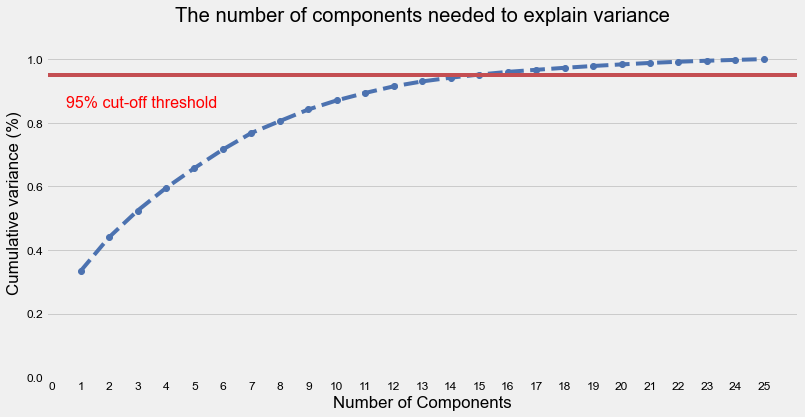

In [196]:
pca = PCA().fit(data)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, len(data.columns)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(data.columns)+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()